In [17]:
import pandas as pd

df_features = pd.read_csv("df_features.csv")
nb_features = pd.read_csv("nb_features.csv")
prithaj_features = pd.read_csv("prithaj_features.csv")
kmeans_labels = pd.read_csv("kmeans_cluster_labels.csv")

kmeans_labels.head()

,author_did,kmeans_cluster
0,did:plc:2224x6c53tqc6dpnbamce2yg,0
1,did:plc:222h35q7urjpjafryjwqn3ae,0
2,did:plc:223surfias2t3sgc3nlumah5,0
3,did:plc:224izruakrnberlqshv5kg2p,0
4,did:plc:224jzjuk3s5kk3zzsezg643r,0


In [18]:
merged_df = df_features.copy()

# These have 'did' in both
merged_df = merged_df.merge(nb_features, on='did', how='left')

# These have different keys: 'did' vs 'author_did'
merged_df = merged_df.merge(prithaj_features, left_on='did', right_on='author_did', how='left')
merged_df = merged_df.merge(kmeans_labels, left_on='did', right_on='author_did', how='left')


In [19]:
merged_df.head()

,did,handle,bio,created_at_x,first_post_created_at,first_post_body,bio length,first post body length,bio_has_emoji,bio_emoji_count,...,is_None,before_open,default_domain,author_did_x,has_mentions_in_bio,has_mentions_in_first_post,has_url_in_bio,has_url_in_first_post,author_did_y,kmeans_cluster
0,did:plc:ooehugjick2vkzwlr64lephm,haleaziz.bsky.social,I cover DHS and immigration policy for the New...,2024-11-18 15:39:52.581,2024-11-16 20:04:59.812,If Trump-Miller-Homan want to shut down the ri...,102.0,299.0,0,0,...,1,False,True,did:plc:ooehugjick2vkzwlr64lephm,False,False,False,False,did:plc:ooehugjick2vkzwlr64lephm,0
1,did:plc:qy3kg6jvtlhenv5ojqurynwh,joshuacroke.bsky.social,Founder of 🏳️‍🌈 queerforcities.com / 🌈loveyour...,2024-11-15 11:45:12.223,2024-11-15 07:36:53.045,A they/them here for good trouble and out to m...,219.0,300.0,1,9,...,1,False,True,did:plc:qy3kg6jvtlhenv5ojqurynwh,False,False,False,False,did:plc:qy3kg6jvtlhenv5ojqurynwh,0
2,did:plc:ibqwicj6ersmvw36yldikozx,inspiringtimmy.bsky.social,Best known for watching the Queen's Gambit fro...,2024-11-06 08:11:15.881,2024-11-14 10:18:29.817,Foundations day 3\n\nlive now!,230.0,28.0,0,0,...,1,False,True,did:plc:ibqwicj6ersmvw36yldikozx,False,False,False,False,did:plc:ibqwicj6ersmvw36yldikozx,0
3,did:plc:f4ultoamz3y2m4drcjvhoecu,wilmonstouches.bsky.social,"same name but not rosh‘s ex | #OMAR : ”oh, tha...",2024-11-15 17:01:25.026,2024-11-15 17:20:49.418,it‘s cuz the nice ones switched to here and th...,126.0,71.0,0,0,...,1,False,True,did:plc:f4ultoamz3y2m4drcjvhoecu,False,False,False,False,did:plc:f4ultoamz3y2m4drcjvhoecu,0
4,did:plc:yzhdirwmonvaezndwnssoosd,kerrieneet.bsky.social,Wild places in the SW and beyond. Where to go?...,2024-11-20 01:32:25.972,2024-11-21 08:01:57.791,I would love to be added,255.0,24.0,0,0,...,1,False,True,did:plc:yzhdirwmonvaezndwnssoosd,False,False,False,False,did:plc:yzhdirwmonvaezndwnssoosd,0


In [20]:
merged_df = merged_df.drop(columns=['author_did_x', 'author_did_y'], errors='ignore')
merged_df = merged_df.drop(columns=['created_at_y'], errors='ignore')
merged_df = merged_df.rename(columns={'created_at_x': 'created_at'})

In [21]:
merged_df.head()


,did,handle,bio,created_at,first_post_created_at,first_post_body,bio length,first post body length,bio_has_emoji,bio_emoji_count,...,is_Writer,is_Other,is_None,before_open,default_domain,has_mentions_in_bio,has_mentions_in_first_post,has_url_in_bio,has_url_in_first_post,kmeans_cluster
0,did:plc:ooehugjick2vkzwlr64lephm,haleaziz.bsky.social,I cover DHS and immigration policy for the New...,2024-11-18 15:39:52.581,2024-11-16 20:04:59.812,If Trump-Miller-Homan want to shut down the ri...,102.0,299.0,0,0,...,0,0,1,False,True,False,False,False,False,0
1,did:plc:qy3kg6jvtlhenv5ojqurynwh,joshuacroke.bsky.social,Founder of 🏳️‍🌈 queerforcities.com / 🌈loveyour...,2024-11-15 11:45:12.223,2024-11-15 07:36:53.045,A they/them here for good trouble and out to m...,219.0,300.0,1,9,...,0,0,1,False,True,False,False,False,False,0
2,did:plc:ibqwicj6ersmvw36yldikozx,inspiringtimmy.bsky.social,Best known for watching the Queen's Gambit fro...,2024-11-06 08:11:15.881,2024-11-14 10:18:29.817,Foundations day 3\n\nlive now!,230.0,28.0,0,0,...,0,0,1,False,True,False,False,False,False,0
3,did:plc:f4ultoamz3y2m4drcjvhoecu,wilmonstouches.bsky.social,"same name but not rosh‘s ex | #OMAR : ”oh, tha...",2024-11-15 17:01:25.026,2024-11-15 17:20:49.418,it‘s cuz the nice ones switched to here and th...,126.0,71.0,0,0,...,0,0,1,False,True,False,False,False,False,0
4,did:plc:yzhdirwmonvaezndwnssoosd,kerrieneet.bsky.social,Wild places in the SW and beyond. Where to go?...,2024-11-20 01:32:25.972,2024-11-21 08:01:57.791,I would love to be added,255.0,24.0,0,0,...,0,0,1,False,True,False,False,False,False,0


In [22]:
nan_rows = merged_df[merged_df.isna().any(axis=1)]
print(nan_rows)


                                    did                      handle  \
25     did:plc:5novqrypd776ussg7ommt6dr       asianmenx.bsky.social   
65     did:plc:xwe4r46ab2ql4y2o2aamyoxf      ryneismean.bsky.social   
86     did:plc:7w2y6iuig3xzazmwggufvcth   trudygonzales.bsky.social   
110    did:plc:46jx7jjivmk3ge4n2yfysw6t      simonwhale.bsky.social   
111    did:plc:7a47nphhiy37rrori2vrrvo5                      rds.ca   
...                                 ...                         ...   
23248  did:plc:jbhnrxwr7pb25w4427nqmtej      mjerickson.bsky.social   
23301  did:plc:cr7gvizavdahwqarhg3hilmj    jemthewriter.bsky.social   
23315  did:plc:d7z6jlndtrnvvii7b6ry4pcl  necroticspider.bsky.social   
23330  did:plc:67yljp3x2ggfmtouqhzm23ax     quigonejinn.bsky.social   
23334  did:plc:tdque7aiu4isr7w2ykaxmidz    jayhulmepoet.bsky.social   

                                                     bio  \
25     Celebrating and admiring Asian Men. Mature vie...   
65                         

In [26]:
# Replace NaN in 'bio' with empty string
merged_df['bio'] = merged_df['bio'].fillna('')

# Replace NaN in 'first_post_body' with empty string
merged_df['first_post_body'] = merged_df['first_post_body'].fillna('')

In [27]:
import pandas as pd

# Show all rows in output
pd.set_option('display.max_rows', None)

# NaN summary
print(merged_df.isna().sum().sort_values(ascending=False))

# Optional: reset the setting afterward if needed
pd.reset_option('display.max_rows')


first_post_created_at         870
time_to_first_post_days       870
has_url_in_bio                407
has_mentions_in_bio           407
did                             0
is_Pilot                        0
is_Painter                      0
is_Photographer                 0
is_Physician                    0
is_Physicist                    0
is_Producer                     0
is_Priest                       0
is_Operations                   0
is_Project_Manager              0
is_Psychiatrist                 0
is_Psychologist                 0
is_Packer                       0
is_Musician                     0
is_Nurse                        0
is_Nun                          0
is_Reporter                     0
is_Miller                       0
is_Microbiologist               0
is_Meteorologist                0
is_Mechanic                     0
is_Mathematician                0
is_Literary_Agent               0
is_Linguist                     0
is_Librarian                    0
is_Lecturer   

In [1]:
import platform
print(platform.machine())  # should say 'arm64'



x86_64


In [28]:
merged_df.to_csv("merged_df.csv", index=False)

In [ ]:
print("hello world")

In [3]:
pip install "numpy<2"


  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.1.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pandas as pd

merged_df = pd.read_csv("merged_df.csv")


In [2]:
merged_df


,did,handle,bio,created_at,first_post_created_at,first_post_body,bio length,first post body length,bio_has_emoji,bio_emoji_count,...,is_Writer,is_Other,is_None,before_open,default_domain,has_mentions_in_bio,has_mentions_in_first_post,has_url_in_bio,has_url_in_first_post,kmeans_cluster
0,did:plc:ooehugjick2vkzwlr64lephm,haleaziz.bsky.social,I cover DHS and immigration policy for the New...,2024-11-18 15:39:52.581,2024-11-16 20:04:59.812,If Trump-Miller-Homan want to shut down the ri...,102.0,299.0,0,0,...,0,0,1,False,True,False,False,False,False,0
1,did:plc:qy3kg6jvtlhenv5ojqurynwh,joshuacroke.bsky.social,Founder of 🏳️‍🌈 queerforcities.com / 🌈loveyour...,2024-11-15 11:45:12.223,2024-11-15 07:36:53.045,A they/them here for good trouble and out to m...,219.0,300.0,1,9,...,0,0,1,False,True,False,False,False,False,0
2,did:plc:ibqwicj6ersmvw36yldikozx,inspiringtimmy.bsky.social,Best known for watching the Queen's Gambit fro...,2024-11-06 08:11:15.881,2024-11-14 10:18:29.817,Foundations day 3\n\nlive now!,230.0,28.0,0,0,...,0,0,1,False,True,False,False,False,False,0
3,did:plc:f4ultoamz3y2m4drcjvhoecu,wilmonstouches.bsky.social,"same name but not rosh‘s ex | #OMAR : ”oh, tha...",2024-11-15 17:01:25.026,2024-11-15 17:20:49.418,it‘s cuz the nice ones switched to here and th...,126.0,71.0,0,0,...,0,0,1,False,True,False,False,False,False,0
4,did:plc:yzhdirwmonvaezndwnssoosd,kerrieneet.bsky.social,Wild places in the SW and beyond. Where to go?...,2024-11-20 01:32:25.972,2024-11-21 08:01:57.791,I would love to be added,255.0,24.0,0,0,...,0,0,1,False,True,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23330,did:plc:67yljp3x2ggfmtouqhzm23ax,quigonejinn.bsky.social,NaN,2023-07-25 19:58:17.493,NaN,"and yeah, I believe, deeply, that’s the kind o...",0.0,256.0,0,0,...,0,0,1,True,True,NaN,False,NaN,False,0
23331,did:plc:64vgrlkpc25gq7dzgv4wk4fz,raywillmott.bsky.social,Some Welsh Brand Manager in games @rawfury.bsk...,2023-07-23 23:19:36.113,2023-07-26 18:24:00.221,Made a curry tonight. One mouthful later and I...,143.0,124.0,0,0,...,1,0,0,True,True,True,False,False,False,0
23332,did:plc:ld6amztvyqa6dkyfpuw7agz3,madrigal.bsky.social,"I have a shiny, smooth coat and a precise, int...",2023-07-04 16:56:13.032,2023-05-04 10:50:34.133,Being an earthworm would be awesome. If you ge...,186.0,129.0,0,0,...,0,0,1,True,True,False,False,False,False,0
23333,did:plc:ifcposy3e6frphvetobi7mva,foxpopvli.bsky.social,"🔸 Anthros, Cars and Nostalgia\n🔸 100% Natural ...",2023-07-19 23:27:01.452,2023-07-04 08:53:40.821,The fox waifu <3\n\n#art #furry,101.0,29.0,1,3,...,0,0,1,True,True,False,False,False,False,0


In [3]:
import pandas as pd

# Show all rows in output
pd.set_option('display.max_rows', None)

# NaN summary
print(merged_df.isna().sum().sort_values(ascending=False))

# Optional: reset the setting afterward if needed
pd.reset_option('display.max_rows')


time_to_first_post_days       870
first_post_created_at         870
first_post_body               660
bio                           407
has_url_in_bio                407
has_mentions_in_bio           407
did                             0
is_Painter                      0
is_Photographer                 0
is_Physician                    0
is_Physicist                    0
is_Pilot                        0
is_Project_Manager              0
is_Priest                       0
is_Producer                     0
is_Operations                   0
is_Psychiatrist                 0
is_Psychologist                 0
is_Packer                       0
is_Musician                     0
is_Nurse                        0
is_Nun                          0
is_Reporter                     0
is_Miller                       0
is_Microbiologist               0
is_Meteorologist                0
is_Mechanic                     0
is_Mathematician                0
is_Literary_Agent               0
is_Linguist   

In [11]:
pd.set_option('display.max_rows', None)
value_counts_1 = (merged_df == 1).sum().sort_values(ascending=False)
print(value_counts_1)
pd.reset_option('display.max_rows')

default_domain                21050
is_None                       18221
before_open                   15713
bio_has_emoji                  8032
post_has_emoji                 4443
first_is_reply                 4389
bio_has_hashtag                3257
post_emoji_count               3011
post_has_hashtag               2977
has_mentions_in_bio            2736
bio_emoji_count                2637
has_mentions_in_first_post     1528
post_hashtag_count             1497
bio_hashtag_count              1396
first_is_quote                 1210
is_Artist                       883
is_Writer                       582
is_Editor                       517
is_Journalist                   395
is_Illustrator                  308
kmeans_cluster                  302
is_Assistant                    301
is_Historian                    252
is_Other                        250
has_url_in_bio                  184
is_Scientist                    179
is_Producer                     148
is_Reporter                 

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import os
os.environ['LDFLAGS'] = '-L/opt/homebrew/opt/libomp/lib'
os.environ['CPPFLAGS'] = '-I/opt/homebrew/opt/libomp/include'

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fill NA for has_mentions_in_bio and has_url_in_bio
merged_df['has_mentions_in_bio'] = merged_df['has_mentions_in_bio'].fillna(0)
merged_df['has_url_in_bio'] = merged_df['has_url_in_bio'].fillna(0)

# Drop rows with any missing values
merged_df_clean = merged_df.dropna()
merged_df_clean

# select features and target
X = merged_df_clean.drop(columns=['kmeans_cluster', 'did', 'handle', 'first_post_body', 'bio', 'created_at', 'first_post_created_at'])
y = merged_df_clean['kmeans_cluster']


In [101]:
import pandas as pd

# Show all rows in output
pd.set_option('display.max_rows', None)

# NaN summary
print(X.isna().sum().sort_values(ascending=False))

# Optional: reset the setting afterward if needed
pd.reset_option('display.max_rows')


bio length                    0
is_Representative             0
is_Publisher                  0
is_Psychologist               0
is_Psychiatrist               0
is_Project_Manager            0
is_Producer                   0
is_Priest                     0
is_Pilot                      0
is_Physicist                  0
is_Physician                  0
is_Photographer               0
is_Painter                    0
is_Packer                     0
is_Operations                 0
is_Nurse                      0
is_Nun                        0
is_Musician                   0
is_Miller                     0
is_Microbiologist             0
is_Meteorologist              0
is_Mechanic                   0
is_Mathematician              0
is_Literary_Agent             0
is_Linguist                   0
is_Reporter                   0
is_Research_Director          0
is_Lecturer                   0
is_Research_Scientist         0
has_url_in_bio                0
has_mentions_in_first_post    0
has_ment

[0]	validation_0-logloss:0.52191
[1]	validation_0-logloss:0.42358
[2]	validation_0-logloss:0.35672
[3]	validation_0-logloss:0.31824
[4]	validation_0-logloss:0.28822
[5]	validation_0-logloss:0.26083
[6]	validation_0-logloss:0.24107
[7]	validation_0-logloss:0.22690
[8]	validation_0-logloss:0.21336
[9]	validation_0-logloss:0.20433
[10]	validation_0-logloss:0.19924
[11]	validation_0-logloss:0.19321
[12]	validation_0-logloss:0.18528
[13]	validation_0-logloss:0.17912
[14]	validation_0-logloss:0.16569
[15]	validation_0-logloss:0.16155
[16]	validation_0-logloss:0.15654
[17]	validation_0-logloss:0.15334
[18]	validation_0-logloss:0.14988
[19]	validation_0-logloss:0.14831
[20]	validation_0-logloss:0.14217
[21]	validation_0-logloss:0.13837
[22]	validation_0-logloss:0.13613
[23]	validation_0-logloss:0.13274
[24]	validation_0-logloss:0.13064
[25]	validation_0-logloss:0.12912
[26]	validation_0-logloss:0.12397
[27]	validation_0-logloss:0.12141
[28]	validation_0-logloss:0.12024
[29]	validation_0-loglos

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:49:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[57]	validation_0-logloss:0.07735
[58]	validation_0-logloss:0.07742
[59]	validation_0-logloss:0.07677
[60]	validation_0-logloss:0.07621
[61]	validation_0-logloss:0.07606
[62]	validation_0-logloss:0.07522
[63]	validation_0-logloss:0.07542
[64]	validation_0-logloss:0.07494
[65]	validation_0-logloss:0.07449
[66]	validation_0-logloss:0.07428
[67]	validation_0-logloss:0.07428
[68]	validation_0-logloss:0.07414
[69]	validation_0-logloss:0.07305
[70]	validation_0-logloss:0.07306
[71]	validation_0-logloss:0.07307
[72]	validation_0-logloss:0.07275
[73]	validation_0-logloss:0.07236
[74]	validation_0-logloss:0.07203
[75]	validation_0-logloss:0.07216
[76]	validation_0-logloss:0.07234
[77]	validation_0-logloss:0.07222
[78]	validation_0-logloss:0.07143
[79]	validation_0-logloss:0.07153
[80]	validation_0-logloss:0.07126
[81]	validation_0-logloss:0.07110
[82]	validation_0-logloss:0.07102
[83]	validation_0-logloss:0.07094
[84]	validation_0-logloss:0.07006
[85]	validation_0-logloss:0.07007
[86]	validatio

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

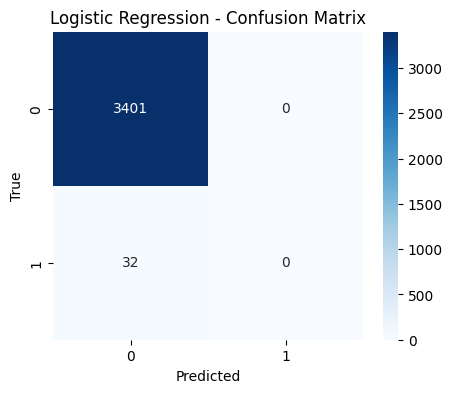


🔍 SVM
Accuracy: 0.9906787066705506
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3401
           1       0.00      0.00      0.00        32

    accuracy                           0.99      3433
   macro avg       0.50      0.50      0.50      3433
weighted avg       0.98      0.99      0.99      3433



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

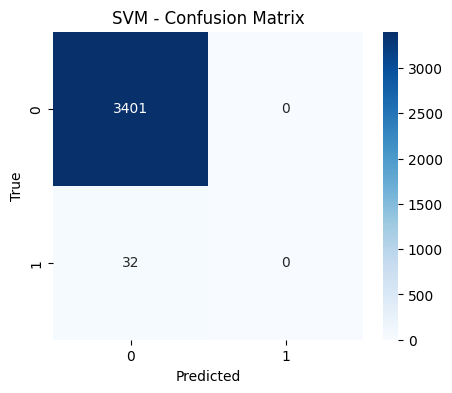


🔍 Random Forest
Accuracy: 0.9906787066705506
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3401
           1       0.00      0.00      0.00        32

    accuracy                           0.99      3433
   macro avg       0.50      0.50      0.50      3433
weighted avg       0.98      0.99      0.99      3433



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

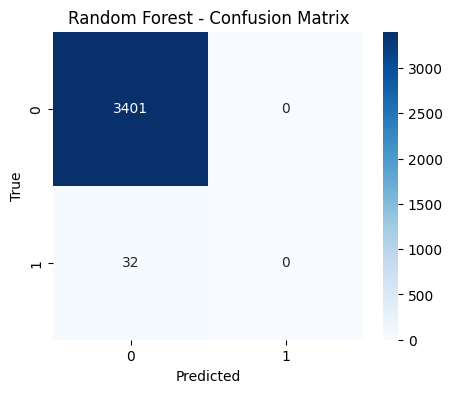


🔍 XGBoost


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9883483833381882
Precision: 0.16666666666666666
Recall: 0.0625
F1 Score: 0.09090909090909091

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.17      0.06      0.09        32

    accuracy                           0.99      3433
   macro avg       0.58      0.53      0.54      3433
weighted avg       0.98      0.99      0.99      3433



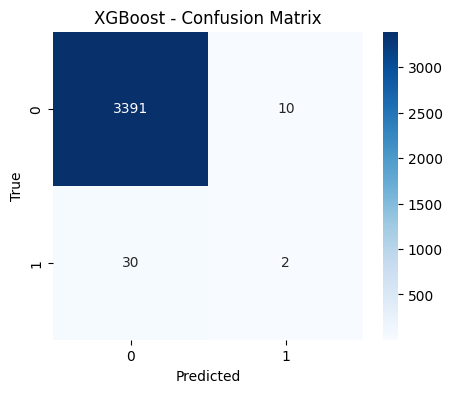


🔍 HGB Gradient Boosting Classifier
Accuracy: 0.9895135450043694
Precision: 0.25
Recall: 0.0625
F1 Score: 0.1

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.25      0.06      0.10        32

    accuracy                           0.99      3433
   macro avg       0.62      0.53      0.55      3433
weighted avg       0.98      0.99      0.99      3433



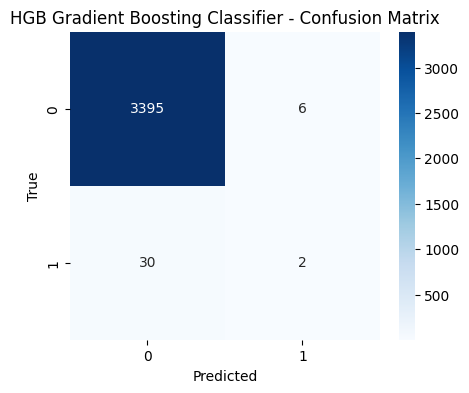


🔍 Logistic Regression (Balanced)
Accuracy: 0.7582289542674046
Precision: 0.03058823529411765
Recall: 0.8125
F1 Score: 0.05895691609977324

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      3401
           1       0.03      0.81      0.06        32

    accuracy                           0.76      3433
   macro avg       0.51      0.79      0.46      3433
weighted avg       0.99      0.76      0.85      3433



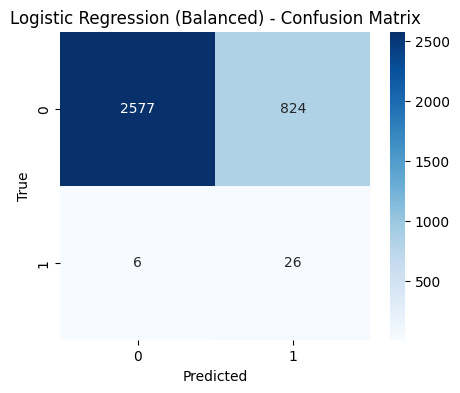


🔍 SVM (Balanced)
Accuracy: 0.7413341101077775
Precision: 0.02338530066815145
Recall: 0.65625
F1 Score: 0.04516129032258064

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      3401
           1       0.02      0.66      0.05        32

    accuracy                           0.74      3433
   macro avg       0.51      0.70      0.45      3433
weighted avg       0.99      0.74      0.84      3433



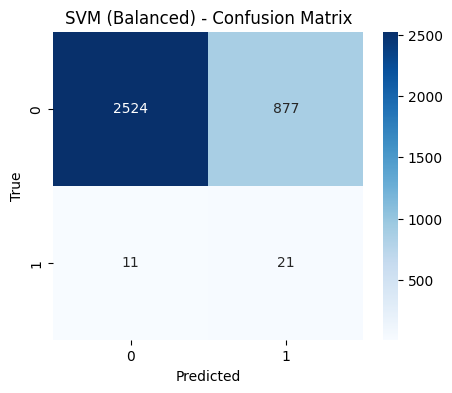


🔍 Random Forest (Balanced)
Accuracy: 0.9898048354209147
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.00      0.00      0.00        32

    accuracy                           0.99      3433
   macro avg       0.50      0.50      0.50      3433
weighted avg       0.98      0.99      0.99      3433



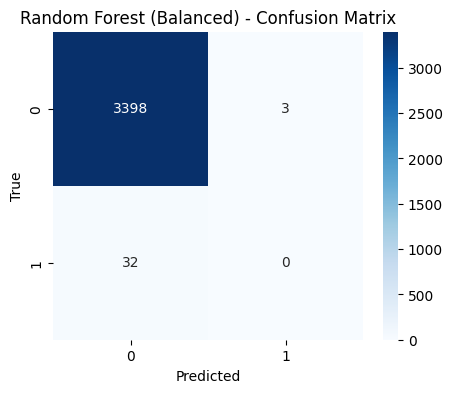


🔍 XGBoost (Balanced)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9822312845907369
Precision: 0.1282051282051282
Recall: 0.15625
F1 Score: 0.14084507042253522

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.13      0.16      0.14        32

    accuracy                           0.98      3433
   macro avg       0.56      0.57      0.57      3433
weighted avg       0.98      0.98      0.98      3433



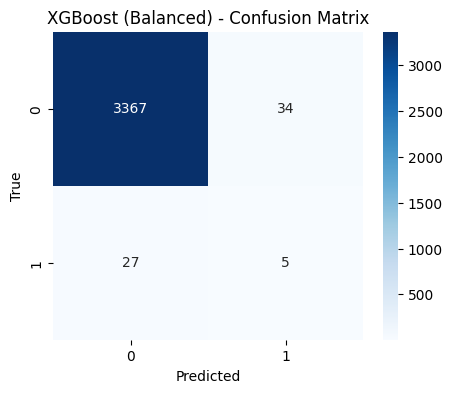


🔍 XGBoost with Iterations


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9822312845907369
Precision: 0.1282051282051282
Recall: 0.15625
F1 Score: 0.14084507042253522

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.13      0.16      0.14        32

    accuracy                           0.98      3433
   macro avg       0.56      0.57      0.57      3433
weighted avg       0.98      0.98      0.98      3433



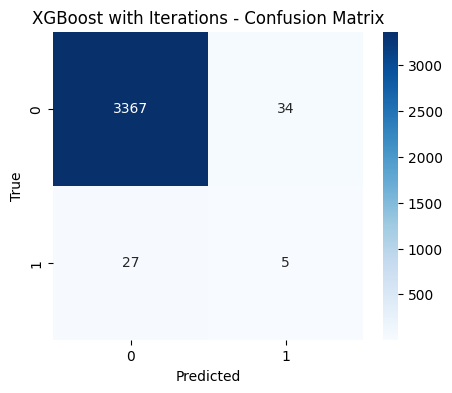


🔍 HGB Classifier (Balanced)
Accuracy: 0.9892222545878241
Precision: 0.14285714285714285
Recall: 0.03125
F1 Score: 0.05128205128205128

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.14      0.03      0.05        32

    accuracy                           0.99      3433
   macro avg       0.57      0.51      0.52      3433
weighted avg       0.98      0.99      0.99      3433



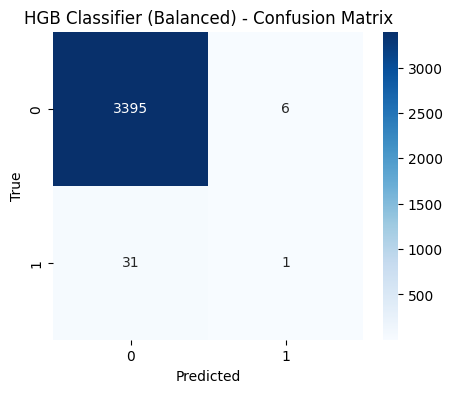


🔍 Ensemble (Voting Classifier)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9898048354209147
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.00      0.00      0.00        32

    accuracy                           0.99      3433
   macro avg       0.50      0.50      0.50      3433
weighted avg       0.98      0.99      0.99      3433



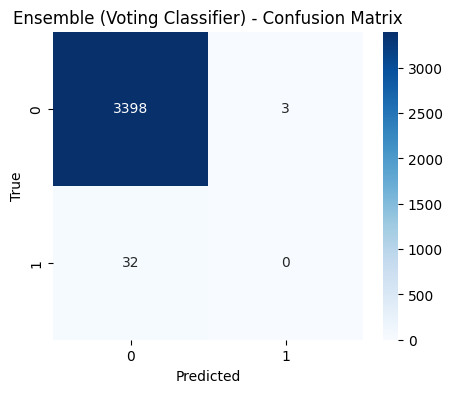


🔍 Ensemble and Logistic(Bal) Ensemble


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:52:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9732012816778328
Precision: 0.08333333333333333
Recall: 0.1875
F1 Score: 0.11538461538461539

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3401
           1       0.08      0.19      0.12        32

    accuracy                           0.97      3433
   macro avg       0.54      0.58      0.55      3433
weighted avg       0.98      0.97      0.98      3433



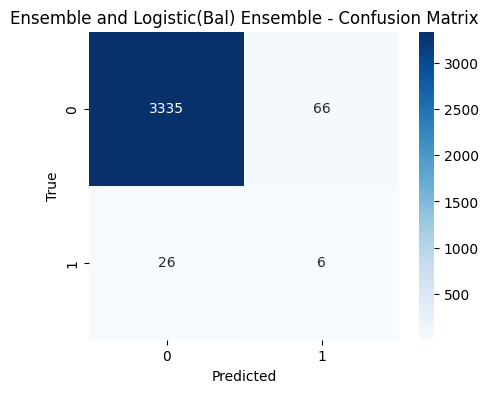

In [127]:

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42)

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# class imbalance ratios
scale = y_train.value_counts()[0] / y_train.value_counts()[1]
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# defined baseline models
# These models treat all classes equally, regardless of how imbalanced the dataset is

# more balanced models based on class weight
# These versions automatically adjusts the importance of each class based on their frequency in the training data.

# logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_bal = LogisticRegression(max_iter=1000, class_weight='balanced')

# svc
svc = SVC(probability=True)
svc_bal = SVC(probability=True, class_weight='balanced')

# random forest
rf = RandomForestClassifier()
rf_bal = RandomForestClassifier(class_weight='balanced')

# xgboost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_bal = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale)

# iterative xgboost
xgb_iter = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    n_estimators=100
)
xgb_iter.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    verbose=True
)

# Histogram Based Gradient Boosting
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train_scaled, y_train)

hgb_bal = HistGradientBoostingClassifier()
hgb_bal.fit(X_train_scaled, y_train, sample_weight=sample_weights) 

# Combine into ensemble
ensemble = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('svm', svc),
        ('rf', rf),
        ('xgb', xgb),
        ('hgb', hgb),
        ('lr_bal', log_reg_bal),
        ('svm_bal', svc_bal),
        ('rf_bal', rf_bal),
        ('xgb_bal', xgb_bal),
        ('xgb_iter', xgb_iter),
        ('hgb_bal', hgb_bal),
    ],
    voting='soft' # soft uses predict_proba - hard uses voting
)

# Ensemble with Histogram-based gradient boosting and Logistic Balanced
hgb_and_logistic_bal = VotingClassifier(
    estimators=[
        ('lr_bal', log_reg_bal),
        ('hgb_bal', hgb_bal),
    ],
    voting='soft' # soft uses predict_proba - hard uses voting
)

# define classifiers
models = {
    "Logistic Regression": log_reg,
    "SVM": svc,
    "Random Forest": rf,
    "XGBoost": xgb,
    "HGB Gradient Boosting Classifier": hgb,
    "Logistic Regression (Balanced)": log_reg_bal,
    "SVM (Balanced)": svc_bal,
    "Random Forest (Balanced)": rf_bal,
    "XGBoost (Balanced)": xgb_bal,
    "XGBoost with Iterations": xgb_iter,
    "HGB Classifier (Balanced)": hgb_bal,
    "Ensemble (Voting Classifier)": ensemble,
    "HGB and Logistic(Bal) Ensemble": hgb_and_logistic_bal
}
print(y.value_counts(normalize=True))

# train, predict, evaluate
for name, model in models.items():
    print(f"\n🔍 {name}")

    # train
    model.fit(X_train_scaled, y_train)

    # predict
    y_pred = model.predict(X_val_scaled)

    # evaluate
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred, average='binary'))
    print("Recall:", recall_score(y_val, y_pred, average='binary'))
    print("F1 Score:", f1_score(y_val, y_pred, average='binary'))

    # full classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))

    # confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:53:28] WARNING: /Users/runner/work/

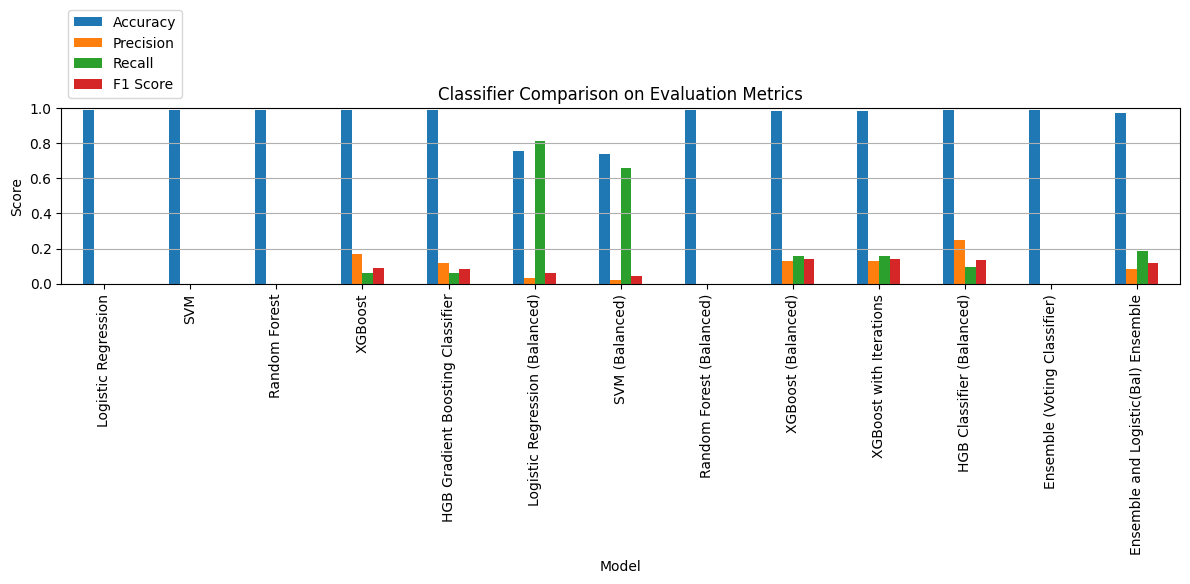

In [129]:
# Collect metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_val, y_pred))
    metrics['Precision'].append(precision_score(y_val, y_pred, average='binary'))
    metrics['Recall'].append(recall_score(y_val, y_pred, average='binary'))
    metrics['F1 Score'].append(f1_score(y_val, y_pred, average='binary'))

# convert to dataframe
metrics_df = pd.DataFrame(metrics)

# plot
ax = metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title("Classifier Comparison on Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.grid(axis='y')
ax.legend(loc='lower left', bbox_to_anchor=(0, 1.02), ncol=1)
plt.tight_layout()
plt.show()